In [1]:
%matplotlib notebook
import aipy, uvtools
import numpy as np
import pylab as plt
import os
from pathlib import Path
from hera_sim.interpolators import Beam
from hera_sim import foregrounds, noise, sigchain, rfi

/Users/qqz/hera_sim/hera_sim/adjustment.py:28: UserWarning: git is not installed. Rephasing tool unavailable.
  warn(f"{missing} is not installed. Rephasing tool unavailable.")


In [2]:
fqs = np.linspace(.1,.2,1024,endpoint=False)
lsts = np.linspace(0,2*np.pi,10000, endpoint=False)
times = lsts / (2*np.pi) * aipy.const.sidereal_day
bl_len_ns = np.array([30., 0, 0])

In [3]:
Tsky_mdl = noise.HERA_Tsky_mdl['xx']
DATA_PATH =  "/Users/qqz/hera_sim/hera_sim/data"
beamfile = os.path.join(DATA_PATH, "HERA_H1C_BEAM_POLY.npy")
omega_p = Beam(beamfile)
vis_fg_diffuse = foregrounds.diffuse_foreground(lsts, fqs, bl_len_ns, Tsky_mdl=Tsky_mdl, omega_p=omega_p)

In [10]:
vis_fg_diffuse

array([[30.21519504+2.29575412j, 29.91866294+2.30005861j,
        29.61872354+2.30395361j, ..., 31.08401368+2.28035192j,
        30.79790329+2.28590387j, 30.5082862 +2.29103692j],
       [30.64808666+1.95918599j, 30.35140485+1.96414293j,
        30.05128328+1.96872047j, ..., 31.51716003+1.94200527j,
        31.2309971 +1.94812044j, 30.94129511+1.95384627j],
       [31.07848686+1.62278855j, 30.78170187+1.62839641j,
        30.48144489+1.63365499j, ..., 31.9476767 +1.60383396j,
        31.66150709+1.61051078j, 31.37176629+1.61682783j],
       ...,
       [28.90235831+3.30619123j, 28.60655281+3.30853323j,
        28.30743864+3.31037555j, ..., 29.7695883 +3.29614078j,
        29.48390901+3.29999756j, 29.19482144+3.30334688j],
       [29.34225186+2.96928493j, 29.04615811+2.97228156j,
        28.74672259+2.97480855j, ..., 30.21014826+2.95744906j,
        29.92427987+2.96187142j, 29.63497017+2.96581581j],
       [29.77989049+2.63246332j, 29.48355448+2.63611424j,
        29.18384382+2.63932559

<IPython.core.display.Javascript object>


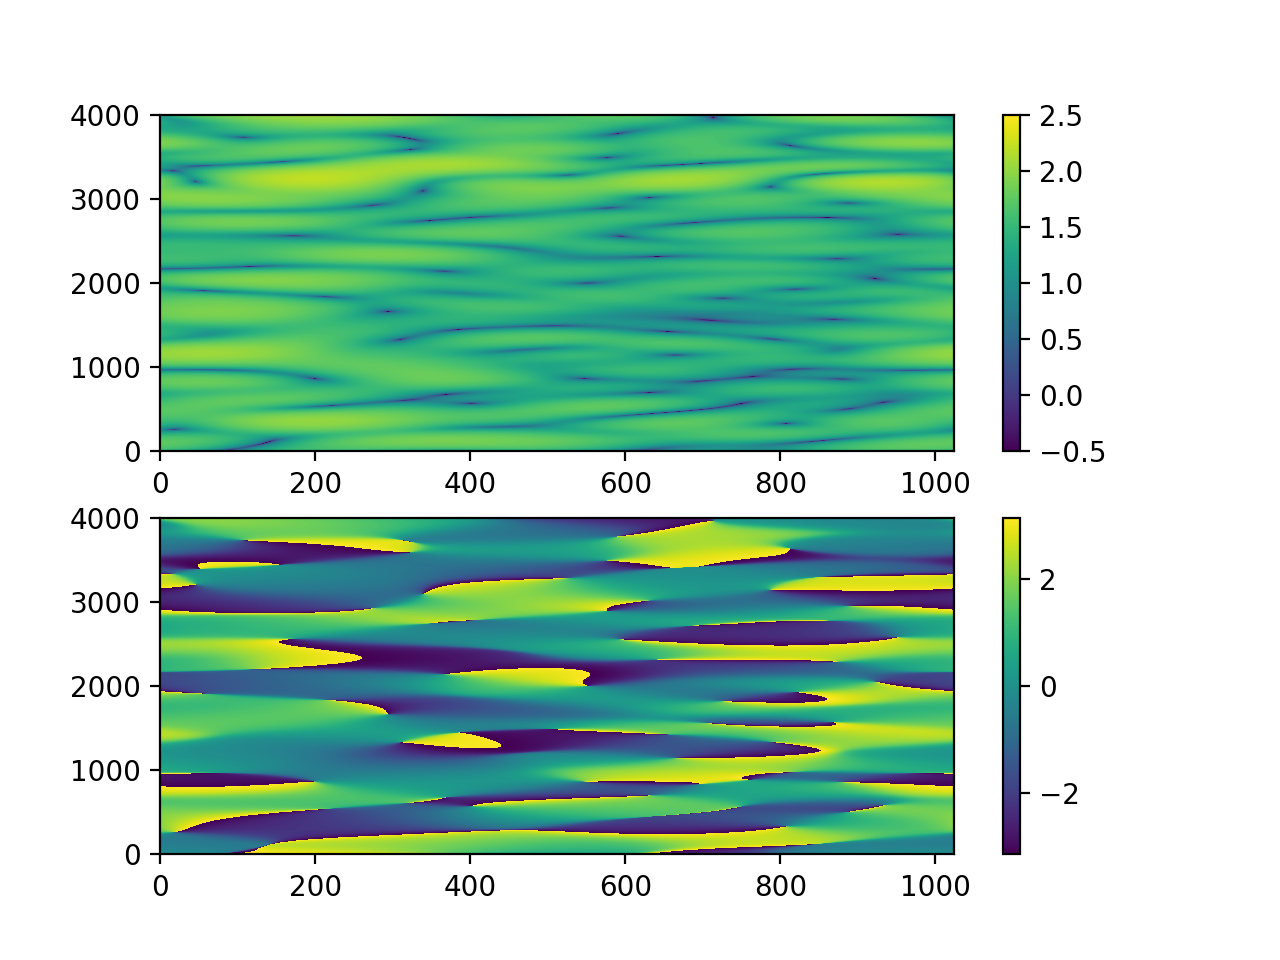

In [11]:
MX, DRNG = 2.5, 3
plt.figure()
plt.subplot(211); uvtools.plot.waterfall(vis_fg_diffuse, mode='log', mx=MX, drng=DRNG); plt.colorbar(); plt.ylim(0,4000)
plt.subplot(212); uvtools.plot.waterfall(vis_fg_diffuse, mode='phs'); plt.colorbar(); plt.ylim(0,4000)
plt.show()

In [2]:
fqs = np.linspace(.1,.2,1024,endpoint=False)
lsts = np.linspace(0,2*np.pi,10000, endpoint=False)
times = lsts / (2*np.pi) * aipy.const.sidereal_day
bl_len_ns = np.array([30., 0, 0])

In [2]:
f_rev = 0.007629400000041642
fqs = np.arange(1345,1345+10240*f_rev,f_rev)
t_rev = 1.00663296
lsts = np.arange(0,5120*t_rev,t_rev)

In [3]:
rfi1 = rfi.rfi_stations(freqs=fqs, lsts=lsts)
rfi2 = rfi.rfi_impulse(freqs=fqs, lsts=lsts, impulse_chance=.3)
rfi3 = rfi.rfi_scatter(freqs=fqs, lsts=lsts, scatter_chance=.05)
rfi_all = rfi1 + rfi2 + rfi3

/var/folders/3j/6rq619453pv1jw0nzwy0swk40000gn/T/ipykernel_1247/3242047095.py:1: UserWarning: You did not specify any stations to simulate.
  rfi1 = rfi.rfi_stations(freqs=fqs, lsts=lsts)


In [7]:
print(rfi_all)

print(rfi_all.shape)

rfi_all1= np.where(rfi_all <=0, 0,rfi_all)

rfi_all2= np.where(rfi_all <=0, -rfi_all,rfi_all)

print(rfi_all1)

[[  0.         +0.j           0.         +0.j
    0.         +0.j         ...   0.         +0.j
    0.         +0.j           0.         +0.j        ]
 [  0.         +0.j           0.         +0.j
    0.         +0.j         ...   0.         +0.j
    0.         +0.j           0.         +0.j        ]
 [ 19.72940442 -3.27881094j  18.13168721 -8.44049281j
   15.21055358-12.98611027j ... -19.11408501 +5.88657406j
  -16.84075464+10.78837259j -13.3382319 +14.90273699j]
 ...
 [  0.         +0.j           0.         +0.j
    0.         +0.j         ...   0.         +0.j
    0.         +0.j           0.         +0.j        ]
 [  2.28988563-19.86847814j -19.57174293 -4.11665866j
   -4.7711709 +19.9294558j  ... -10.48947531+17.02853216j
   15.9860128 +12.01862699j  13.44486463-14.80660714j]
 [  0.         +0.j           0.         +0.j
    0.         +0.j         ...   0.         +0.j
    0.         +0.j           0.         +0.j        ]]
(5120, 10240)
[[ 0.         +0.j          0.         +0.

<IPython.core.display.Javascript object>


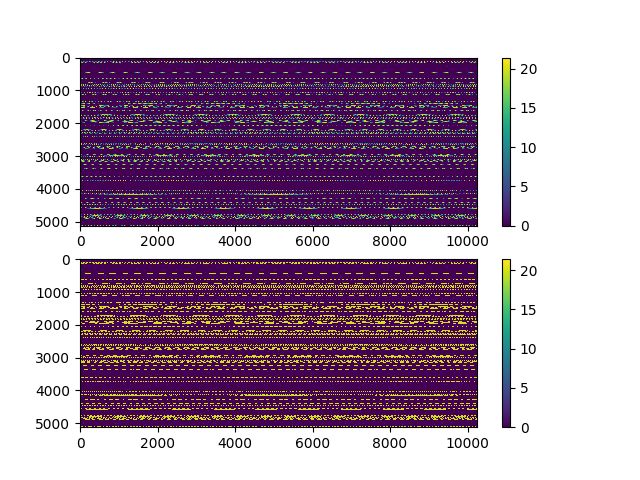

In [9]:
MX, DRNG = 2.5, 3

plt.figure()
plt.subplot(211); uvtools.plot.waterfall(rfi_all1, mode='real'); plt.colorbar(); #plt.ylim(0,10240)
#plt.subplot(211); uvtools.plot.waterfall(rfi_all, mode='real', mx=MX, drng=DRNG); plt.colorbar(); #plt.ylim(0,10240)
plt.subplot(212); uvtools.plot.waterfall(rfi_all1, mode='abs'); plt.colorbar(); #plt.ylim(0,1100)
plt.show()

In [7]:
print(aipy.const.sidereal_day)

86164.0908


In [8]:
lsts = np.linspace(0,2*np.pi,10000, endpoint=False)
lsts
print(lsts.shape)

(10000,)


In [9]:
print(rfi_all.shape)

(1024, 10000)
